<a href="https://colab.research.google.com/github/NehaBhatia103/DataScienceAssignments/blob/main/Assignment_50_startups.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')
from sklearn.preprocessing import normalize

In [ ]:
from google.colab import files
uploaded=files.upload()

Saving 50_Startups.csv to 50_Startups.csv


In [ ]:
data=pd.read_csv("50_Startups.csv")
data.head()

,R&D Spend,Administration,Marketing Spend,State,Profit
0,165349.20,136897.80,471784.10,New York,192261.83
1,162597.70,151377.59,443898.53,California,191792.06
2,153441.51,101145.55,407934.54,Florida,191050.39
3,144372.41,118671.85,383199.62,New York,182901.99
4,142107.34,91391.77,366168.42,Florida,166187.94


In [ ]:
data.describe()

,R&D Spend,Administration,Marketing Spend,Profit
count,50.000000,50.000000,50.000000,50.000000
mean,73721.615600,121344.639600,211025.097800,112012.639200
std,45902.256482,28017.802755,122290.310726,40306.180338
min,0.000000,51283.140000,0.000000,14681.400000
25%,39936.370000,103730.875000,129300.132500,90138.902500
50%,73051.080000,122699.795000,212716.240000,107978.190000
75%,101602.800000,144842.180000,299469.085000,139765.977500
max,165349.200000,182645.560000,471784.100000,192261.830000


There is no null values present in data set as the no of counts are 50.
Mean and median of the data is approximaetly same hence the data is normally distributed

In [ ]:
data.info()  # there is no null value in any of the columns

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50 entries, 0 to 49
Data columns (total 5 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   R&D Spend        50 non-null     float64
 1   Administration   50 non-null     float64
 2   Marketing Spend  50 non-null     float64
 3   State            50 non-null     object 
 4   Profit           50 non-null     float64
dtypes: float64(4), object(1)
memory usage: 2.1+ KB


In [ ]:
data[data.duplicated()]  # no duplicates found

,R&D Spend,Administration,Marketing Spend,State,Profit


Checking for Outliers:

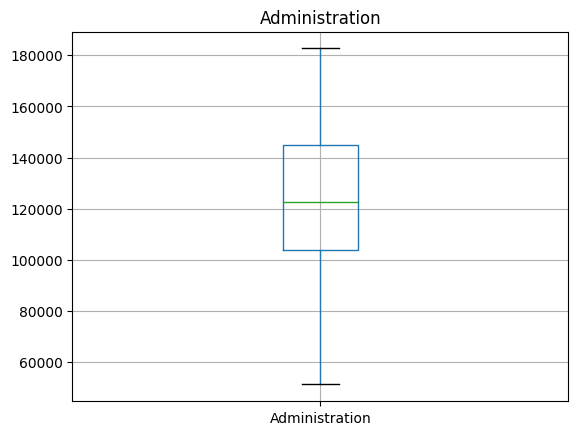

In [ ]:
data.boxplot(["Administration"])
plt.title("Administration")
plt.show()

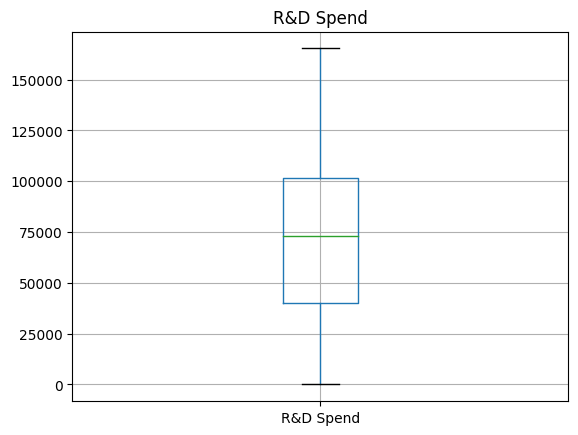

In [ ]:
data.boxplot(["R&D Spend"])
plt.title("R&D Spend")
plt.show()

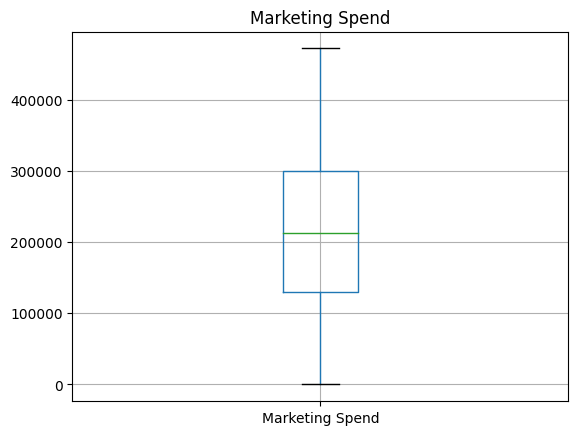

In [ ]:
data.boxplot(["Marketing Spend"])
plt.title("Marketing Spend")
plt.show()

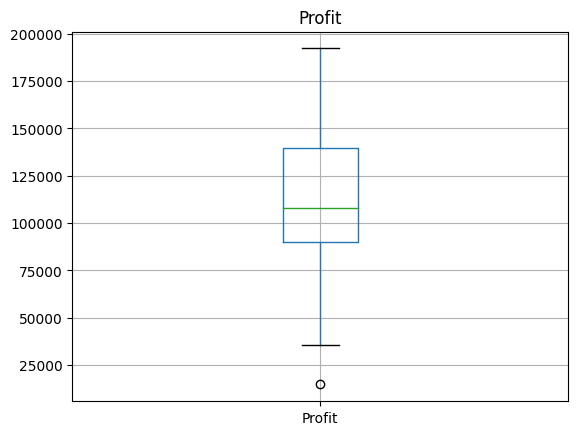

In [ ]:
data.boxplot(["Profit"])
plt.title("Profit")
plt.show()

There are outliers in profit only.Since the outliers are present in less number we can ignore them.

In [ ]:
data=data.rename({"R&D Spend":'RnD',"Administration":'admin',"Marketing Spend":'marketing',"State":'state',"Profit":'profit'},axis=1)
data.head()

,RnD,admin,marketing,state,profit
0,165349.20,136897.80,471784.10,New York,192261.83
1,162597.70,151377.59,443898.53,California,191792.06
2,153441.51,101145.55,407934.54,Florida,191050.39
3,144372.41,118671.85,383199.62,New York,182901.99
4,142107.34,91391.77,366168.42,Florida,166187.94


##Visualization:

<Axes: xlabel='RnD', ylabel='Density'>

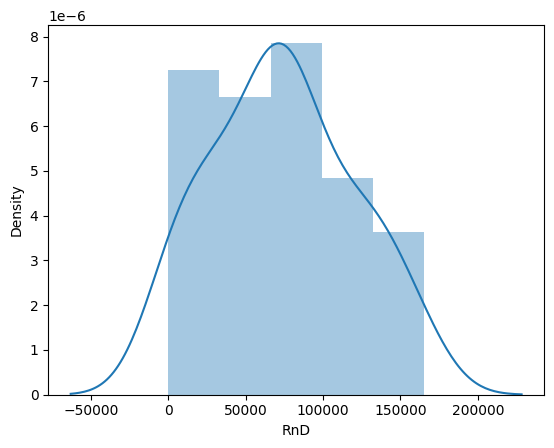

In [ ]:
sns.distplot(data["RnD"])

<Axes: xlabel='admin', ylabel='Density'>

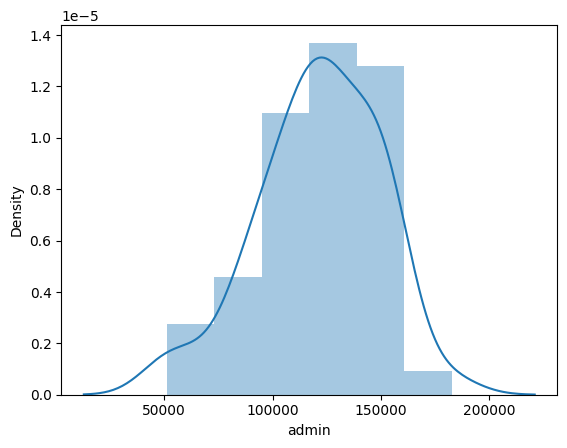

In [ ]:
sns.distplot(data["admin"])

<Axes: xlabel='marketing', ylabel='Density'>

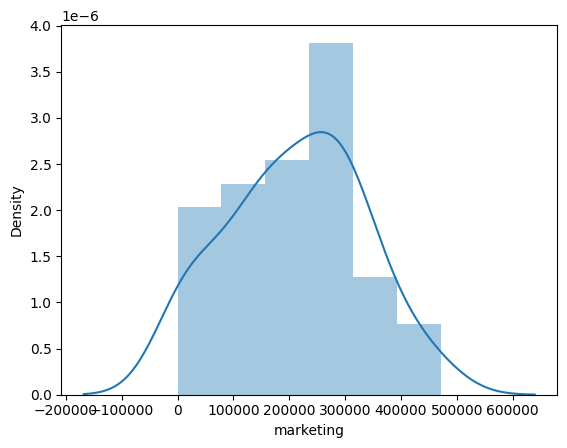

In [ ]:
sns.distplot(data["marketing"])

<Axes: xlabel='profit', ylabel='Density'>

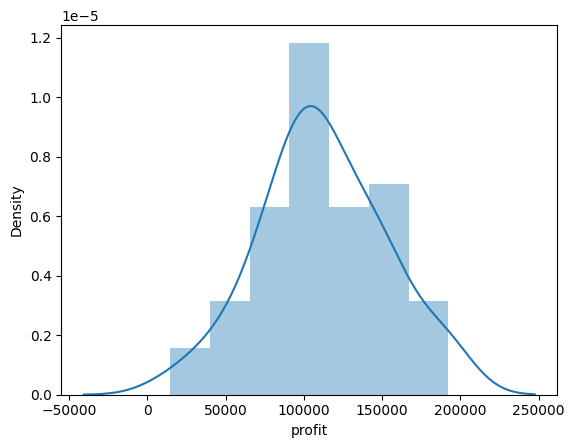

In [ ]:
sns.distplot(data["profit"])

<Axes: ylabel='state'>

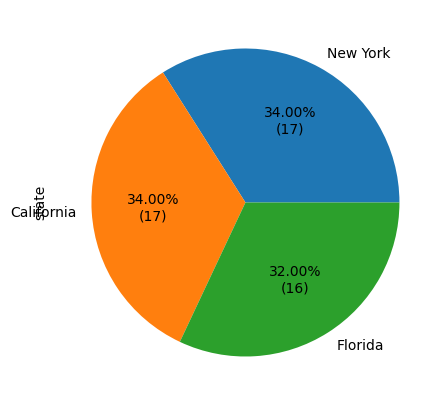

In [ ]:
plt.figure(figsize=(5,5))
data['state'].value_counts().plot(kind='pie',autopct=lambda p:'{:.2f}%\n({:.0f})'.format(p,(p/100)*(data['state'].value_counts().sum())))

In [ ]:
data["state"].value_counts()

New York      17
California    17
Florida       16
Name: state, dtype: int64

Finding the relation between all the independent features with respect to dependent feature

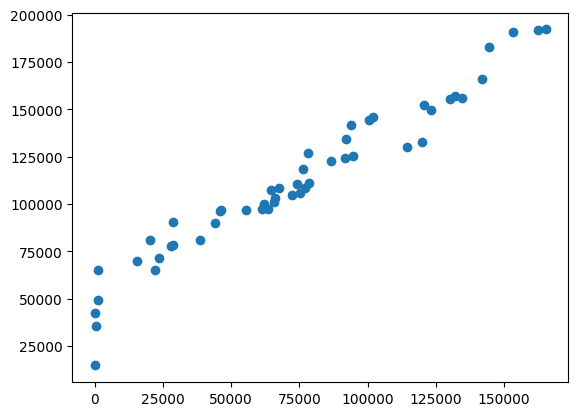

In [ ]:
plt.scatter(data['RnD'],data['profit'])

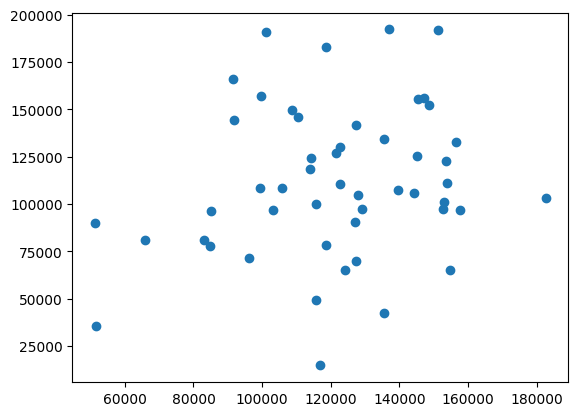

In [ ]:
plt.scatter(data['admin'],data['profit'])

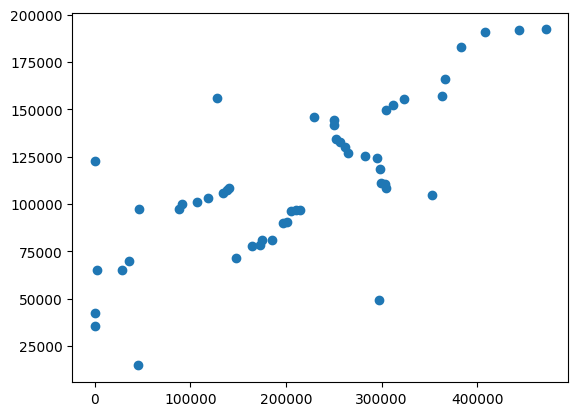

In [ ]:
plt.scatter(data['marketing'],data['profit'])

<Axes: xlabel='state', ylabel='profit'>

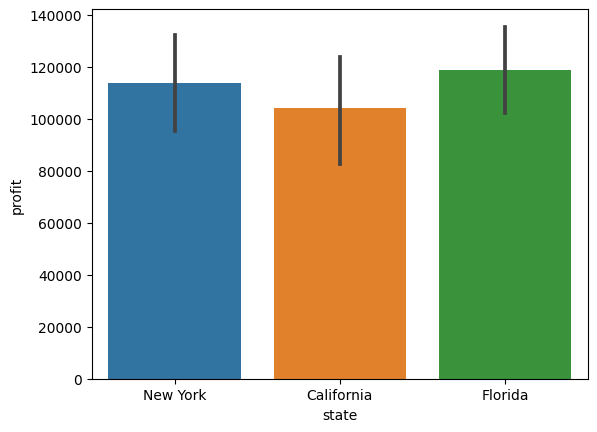

In [ ]:
sns.barplot(x="state",y="profit",data=data)

from the above plots we could see that state column has approx same value of profit hence there is not much difference between how much profit each state makes with other variables.Hence we can drop the column state

In [ ]:
data=data.drop("state",axis=1)

In [ ]:
data.head()

,RnD,admin,marketing,profit
0,165349.20,136897.80,471784.10,192261.83
1,162597.70,151377.59,443898.53,191792.06
2,153441.51,101145.55,407934.54,191050.39
3,144372.41,118671.85,383199.62,182901.99
4,142107.34,91391.77,366168.42,166187.94


checking the correlation between variables

In [ ]:
corr=data.corr()
corr

,RnD,admin,marketing,profit
RnD,1.000000,0.241955,0.724248,0.972900
admin,0.241955,1.000000,-0.032154,0.200717
marketing,0.724248,-0.032154,1.000000,0.747766
profit,0.972900,0.200717,0.747766,1.000000


<Axes: >

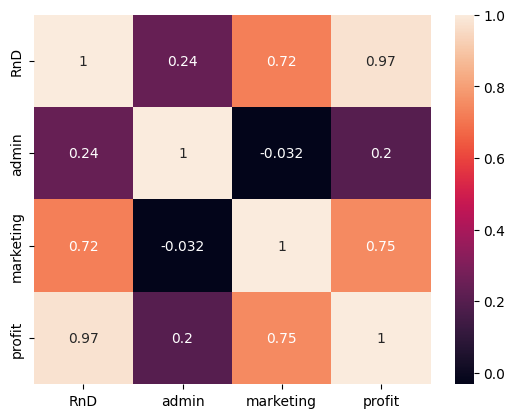

In [ ]:
sns.heatmap(corr,annot=True)

from the plot we can see there is highest value of correlation for r&d.
and also profit depends on marketing also.

Splitting the data set into dependent and  independent variables x and y.

##Preprocessing the data

In [ ]:
from sklearn.preprocessing import StandardScaler
scaler=StandardScaler()
data['RnD']=scaler.fit_transform(data[['RnD']])
data['admin']=scaler.fit_transform(data[['admin']])
data['marketing']=scaler.fit_transform(data[['marketing']])
data['profit']=scaler.fit_transform(data[['profit']])

In [ ]:
data.head()

,RnD,admin,marketing,profit
0,2.016411,0.560753,2.153943,2.011203
1,1.955860,1.082807,1.923600,1.999430
2,1.754364,-0.728257,1.626528,1.980842
3,1.554784,-0.096365,1.422210,1.776627
4,1.504937,-1.079919,1.281528,1.357740


In [ ]:
x=data.iloc[:,:3]
x.head()

,RnD,admin,marketing
0,2.016411,0.560753,2.153943
1,1.955860,1.082807,1.923600
2,1.754364,-0.728257,1.626528
3,1.554784,-0.096365,1.422210
4,1.504937,-1.079919,1.281528


In [ ]:
y=data.profit
y.head()

0    2.011203
1    1.999430
2    1.980842
3    1.776627
4    1.357740
Name: profit, dtype: float64

In [ ]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.20,random_state=20)

#Building Model
1.Liner Regression Model

In [ ]:
from sklearn.linear_model import LinearRegression
model=LinearRegression()
model.fit(x_train,y_train)

LinearRegression()

In [ ]:
y_pred_test=model.predict(x_test)
y_pred_train=model.predict(x_train)
y_pred_test

array([ 0.43837618,  0.95911686,  1.55238443,  1.01732893, -1.66116521,
        1.98129281, -0.25715324,  0.03592783, -1.69290344, -0.05043324])

finding accuracy of the model

In [ ]:
from sklearn.metrics import r2_score
from sklearn.metrics import accuracy_score


In [ ]:
R2_test=r2_score(y_pred_test,y_test)
R2_train=r2_score(y_pred_train,y_train)
print(R2_test,"  ",R2_train)

0.9562881442867326    0.9468920762780186


2. Lasso Model

In [ ]:
def score(y_predict, y_true):
error = np.square(np.log10(y_predict +1) - np.log10(y_true +1)).mean() ** 0.5
score = 1 - error
return score
actual_cost = list(data_val['COST'])
actual_cost = np.asarray(actual_cost)

In [ ]:
from sklearn.linear_model import Lasso
#Initializing the Lasso Regressor with Normalization Factor as True
lasso_reg = Lasso()
#Fitting the Training data to the Lasso regressor
lasso_reg.fit(x_train,y_train)
#Predicting for X_test
y_pred_lass_test =lasso_reg.predict(x_test)
y_pred_lass_train=lasso_reg.predict(x_train)
y_pred_lass_test

array([-0.06041799, -0.06041799, -0.06041799, -0.06041799, -0.06041799,
       -0.06041799, -0.06041799, -0.06041799, -0.06041799, -0.06041799])

In [ ]:
print('R squared training set', round(lasso_reg.score(x_train, y_train)*100, 2))
print('R squared test set', round(lasso_reg.score(x_test, y_test)*100, 2))

R squared training set 0.0
R squared test set -7.91
